In [1]:
import re
from datetime import datetime
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib
import matplotlib.pyplot as plt

In [2]:
with open("clanky.json", "r", encoding="utf-8") as f:
    tab = json.load(f)
tab = pd.json_normalize(tab)
tab = pd.DataFrame.from_dict(tab)

In [3]:
def cleanerurl(url):
    url_separators = ["?utm_","?fbclid","?ref"]
    for separator in url_separators:
        if separator in url:
            url = url.split(separator)[0]
    return(url)

In [4]:
tab["url"] = tab["url"].apply(lambda x: cleanerurl(x))

In [5]:
def domena(url):
    url = url.split("/")[2]
    url = url.split(".")[-2]
    return(url)

In [6]:
tab["domena"] = tab["url"].apply(lambda x: domena(x))

In [7]:
with open('clanky_procistene.json', 'w+', encoding='utf-8') as file:
    tab[["url","titulek","datum"]].to_json(file, date_format='iso', orient="records", indent=4, force_ascii=False)

In [8]:
tab

,url,titulek,datum,autorstvo,keywords,domena
0,https://zpravy.aktualne.cz/zahranici/cinsti-st...,"Čínští studenti si můžou půjčit ve školní ""ban...",2017-01-31,[Zdroj],[],aktualne
1,http://www.bbc.co.uk/programmes/p04b1g3c/episo...,50 Things That Made the Modern Economy,2017-01-31,[],[],co
2,http://www.czechcrunch.cz/2017/01/je-izrael-op...,Je Izrael opravdu druhé Silicon Valley?,2017-01-31,[Dalibor Pulkert],[],czechcrunch
3,http://rodneybrooks.com/unexpected-consequence...,Unexpected Consequences of Self Driving Cars –...,2017-01-31,[],"[brooks, driving, autonomous, level, self, dri...",rodneybrooks
4,http://archiv.ihned.cz/c1-65583860-rene-levins...,"Ví, jak porazit Zemana. Dramatik a matematik R...",2017-01-31,"[Vladimír Ševela, K Účtu Služse Nepodařilo Při...",[],ihned
...,...,...,...,...,...,...
2517,https://astralcodexten.substack.com/p/book-rev...,Book Review: The Man From The Future,2022-12-01,[Scott Alexander],"[book, neumanns, theory, neumann, man, hungary...",substack
2518,https://astralcodexten.substack.com/p/book-rev...,Book Review: What We Owe The Future,2022-12-01,"[Scott Alexander, Jack Handey]","[book, happiness, child, think, world, macaski...",substack
2519,https://blog.eladgil.com/p/ai-revolution-trans...,AI Revolution - Transformers and Large Languag...,2022-12-01,[Elad Gil],"[large, llms, learning, transformers, language...",eladgil
2520,https://zpravy.aktualne.cz/domaci/cesko-spolec...,Česko společně,2022-12-01,[Zdroj],[],aktualne


## statistiky odkazů

In [9]:
urls_unikatni = tab["url"].drop_duplicates().to_list()

In [10]:
len(urls_unikatni)

2449

In [11]:
tab.groupby("url")["datum"].nunique().nlargest(20)

url
https://finmag.penize.cz/predplatne                                                                     8
http://podplayer.net/                                                                                   4
https://docs.google.com/spreadsheets/d/1LwIL_GU6FKMAaXcNAXzVo4SoCD17c2jx-9D1Pxn01YA/edit?usp=sharing    4
https://en.wikipedia.org/wiki/Disappearance_of_Gary_Mathias                                             3
https://fallofcivilizationspodcast.com/                                                                 3
https://finmag.penize.cz/predplatne/vanoce                                                              3
https://www.online.muni.cz/tema/11014-jsou-stastni-ale-nesnasenlivi-sociologove-skladaji-obraz-cechu    3
http://finmag.penize.cz/casopis-finmag                                                                  2
http://finmag.penize.cz/ekonomika/326051-zivot-na-vsi-luxus-na-ktery-vam-prispivaji-druzi               2
http://finmag.penize.cz/kaleidoskop/327905

## statistiky domén

In [12]:
vsecky_urls = tab.url.to_list()

In [13]:
domeny = tab["domena"].to_list()

In [14]:
unikatni_domeny = tab["domena"].drop_duplicates().to_list()

In [15]:
len(unikatni_domeny)

573

In [16]:
pocty = {}
for x in unikatni_domeny:
    pocet = domeny.count(x)
    pocty[x] = pocet
pocty = pd.DataFrame.from_dict(pocty, orient="index", columns=["počet"])

In [17]:
pocty.sort_values(by="počet",ascending=False).head(60)

,počet
penize,338
a2larm,107
irozhlas,89
novinky,78
aktualne,77
denikreferendum,59
nytimes,58
facebook,58
rozhlas,57
theguardian,43


In [18]:
top_domeny = pocty[pocty["počet"] > 15].index.to_list()

In [19]:
tab.groupby("domena")["datum"].count().nlargest(10)

domena
penize             338
a2larm             107
irozhlas            89
novinky             78
aktualne            77
denikreferendum     59
facebook            58
nytimes             58
rozhlas             57
theguardian         43
Name: datum, dtype: int64

In [20]:
tab.groupby(["domena","datum"])["domena"].count().nlargest(10)

domena  datum     
penize  2017-10-05    12
info    2018-01-04     8
mall    2020-03-26     7
penize  2017-10-12     7
        2017-09-14     6
        2017-12-14     6
github  2022-06-30     5
penize  2017-08-24     5
        2017-08-31     5
        2017-09-06     5
Name: domena, dtype: int64

## délka titulků

In [21]:
tab["delka_titulku"]  = tab["titulek"].apply(lambda x: len(x))

In [22]:
tab_cz = tab[(tab.domena.isin(top_domeny)) & tab.url.str.contains(".cz/") & (tab["domena"] != "facebook") & (tab["domena"] != "blogspot")]

(array([12.,  2., 16., 25., 27., 27., 47., 55., 61., 48., 38., 52., 57.,
        43., 53., 36., 53., 70., 44., 41., 43., 35., 29., 44., 37., 12.,
        17.,  4.,  2.,  2.,  3.,  2.,  0.,  1.,  1.]),
 array([  0.        ,   4.11428571,   8.22857143,  12.34285714,
         16.45714286,  20.57142857,  24.68571429,  28.8       ,
         32.91428571,  37.02857143,  41.14285714,  45.25714286,
         49.37142857,  53.48571429,  57.6       ,  61.71428571,
         65.82857143,  69.94285714,  74.05714286,  78.17142857,
         82.28571429,  86.4       ,  90.51428571,  94.62857143,
         98.74285714, 102.85714286, 106.97142857, 111.08571429,
        115.2       , 119.31428571, 123.42857143, 127.54285714,
        131.65714286, 135.77142857, 139.88571429, 144.        ]),
 <BarContainer object of 35 artists>)

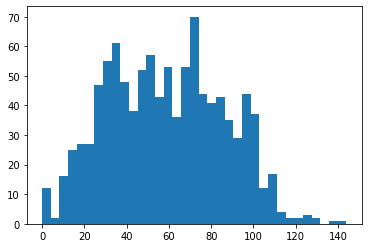

In [23]:
matplotlib.pyplot.hist(tab_cz["delka_titulku"], bins=35)

In [24]:
tab_cz.groupby("domena")["delka_titulku"].median().nlargest(50)

domena
ihned              97.5
irozhlas           95.0
info               89.0
rozhlas            86.0
voxpot             83.0
ceskatelevize      80.0
aktualne           78.0
universitas        74.0
idnes              70.0
novinky            59.5
heroine            56.0
a2larm             55.0
denikreferendum    51.0
respekt            51.0
penize             42.0
vesmir             26.5
Name: delka_titulku, dtype: float64

## vyhledávání článků z jednotlivých webů

In [25]:
tab[tab.url.str.contains("substack")][["url","titulek","datum"]].tail(60)

,url,titulek,datum
1603,https://mattstoller.substack.com/p/will-spotif...,Will Spotify Ruin Podcasting?,2020-02-13
1817,https://breakingsmart.substack.com/p/how-to-ri...,How To Ride Your Brain Bicycle,2020-06-11
2095,https://scholars-stage.blogspot.com/2020/11/wh...,Redirecting The Scholar's Stage,2020-12-03
2110,https://boundedlyrational.substack.com/p/k-zko...,K zákonu o hygienické službě,2020-12-10
2120,https://brettscott.substack.com/p/how-to-write...,How to write a Flintstones history of money,2020-12-17
2122,https://zeynep.substack.com/p/vaccines-and-dec...,"[, , ]",2020-12-17
2162,https://boundedlyrational.substack.com/p/rzn-p...,Různé špatné zprávy,2021-01-21
2201,https://astralcodexten.substack.com/p/covidvit...,COVID/Vitamin D: Much More Than You Wanted To ...,2021-02-18
2218,https://astralcodexten.substack.com/p/trapped-...,Trapped Priors As A Basic Problem Of Rationality,2021-03-25
2228,https://noahpinion.substack.com/p/why-has-clim...,Why has climate economics failed us?,2021-04-21
